https://blog.csdn.net/weixin_38536057/article/details/78702564

In [2]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
# read in the iris data
iris = load_iris()

X = iris.data
y = iris.target

上面的测试准确率可以看出，不同的训练集、测试集分割的方法导致其准确率不同，而交叉验证的基本思想是：将数据集进行一系列分割，生成一组不同的训练测试集，然后分别训练模型并计算测试准确率，最后对结果进行平均处理。这样来有效降低测试准确率的差异。

In [4]:
for i in range(1,5):
    print("random_state is ", i,", and accuracy score is:")
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(metrics.accuracy_score(y_test, y_pred))

random_state is  1 , and accuracy score is:
1.0
random_state is  2 , and accuracy score is:
1.0
random_state is  3 , and accuracy score is:
0.9473684210526315
random_state is  4 , and accuracy score is:
0.9736842105263158


### K-folds實例

In [5]:
# 下面代码演示了K-fold交叉验证是如何进行数据分割的
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle=False)

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start = 1):
    print(iteration, data[0], data[1])

Iteration                   Training set observations                   Testing set observations
1 [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [0 1 2 3 4]
2 [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [5 6 7 8 9]
3 [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24] [10 11 12 13 14]
4 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24] [15 16 17 18 19]
5 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [20 21 22 23 24]


# Cross Validation 例子 

## 1. 用於調節參數

In [6]:
from sklearn.cross_validation import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
# 这里的cross_val_score将交叉验证的整个过程连接起来，不用再进行手动的分割数据
# cv参数用于规定将原始数据分成多少份
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [7]:
# use average accuracy as an estimate of out-of-sample accuracy
# 对十次迭代计算平均的测试准确率
scores.mean()

0.9666666666666668

In [8]:
# search for an optimal value of K for KNN model
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross validated accuracy')

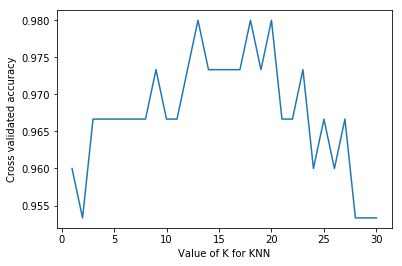

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross validated accuracy")

### 結論：直接用畫圖來找到最佳的參數

上面的例子显示了偏置-方差的折中，K较小的情况时偏置较低，方差较高；K较高的情况时，偏置较高，方差较低；最佳的模型参数取在中间位置，该情况下，使得偏置和方差得以平衡，模型针对于非样本数据的泛化能力是最佳的。

----


## 2. 用於模型選擇 

In [14]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

0.9800000000000001

In [15]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

0.9533333333333334

## 3. 用於特徵選擇

----
下面我们使用advertising数据，通过交叉验证来进行特征的选择，对比不同的特征组合对于模型的预测效果。

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [17]:
# read in the advertising dataset
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head(10)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 76, saw 3


这里要注意的是，上面的scores都是负数，为什么均方误差会出现负数的情况呢？因为这里的mean_squared_error是一种损失函数，优化的目标的使其最小化，而分类准确率是一种奖励函数，优化的目标是使其最大化。

In [18]:
# create a Python list of three feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the DataFrame (X)
X = data[feature_cols]

# select the Sales column as the response (y)
y = data.sales

TypeError: tuple indices must be integers or slices, not list

In [ ]:
# 10-fold cv with all features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')
print(scores)

In [ ]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

In [ ]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

In [ ]:
# calculate the average RMSE
print(rmse_scores.mean())

In [ ]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')).mean())